In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Dropping passenger ID as it holds only id which is no longer usd for analysis
df.drop('PassengerId',axis=1,inplace=True)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
#we observe that age cabin embarked holds null value in large nos,so we replace the Nan values

In [9]:
a=np.mean(df['Age'])

In [10]:
round(a)

30

In [11]:
df['Age']=df['Age'].replace(np.NaN,round(a))

In [12]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
from statistics import mode
mode(df['Cabin'])

nan

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#filling null values of embarked with major embarkation values i.e S
df['Embarked']=df['Embarked'].fillna('S')

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [17]:
#As we observe that out of 890 values 687 have missing values in cabin class,hence assigning "AB" as absent values because cabin column doesnt matter much for analysis
df['Cabin']=df['Cabin'].fillna('AB')

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [19]:
#we observe that Name column has every unique name which is not further useful for analysis,hence extracting title(MR and Mrs) from name column for data cleaning


In [20]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df['Survived'].nunique()

2

In [23]:
#seperating categorical and numerical columns
cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [24]:
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [25]:
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [26]:
for i in num:
   print( df[i].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [27]:
#EDA-UNIVARIATE ANALYSIS

<Axes: xlabel='Survived', ylabel='count'>

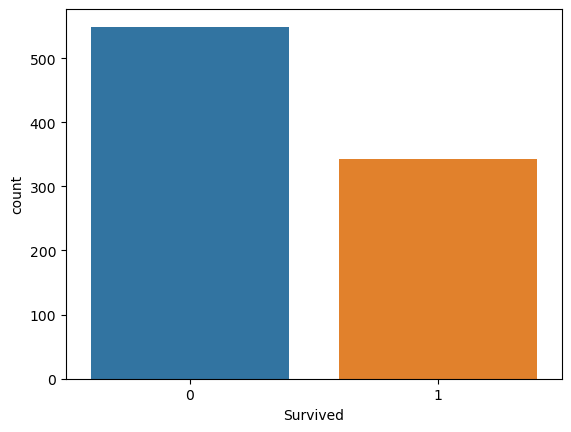

In [30]:
sns.countplot(data=df,x='Survived')

In [ ]:
#We observe that people who have survived are less in number

<Axes: xlabel='Pclass', ylabel='count'>

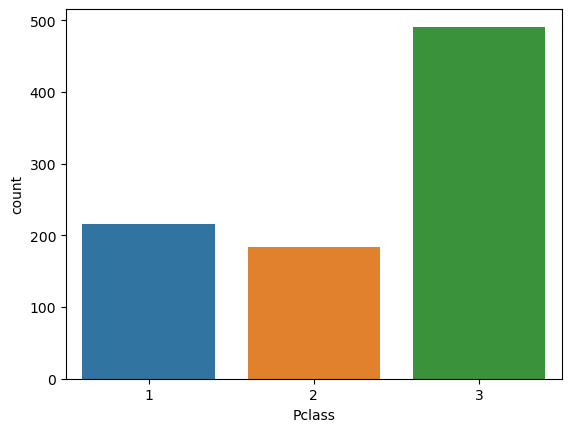

In [31]:
sns.countplot(data=df,x='Pclass')

In [32]:
#We observe that 3rd class people who have boarded on ship are more in number

<Axes: xlabel='SibSp', ylabel='count'>

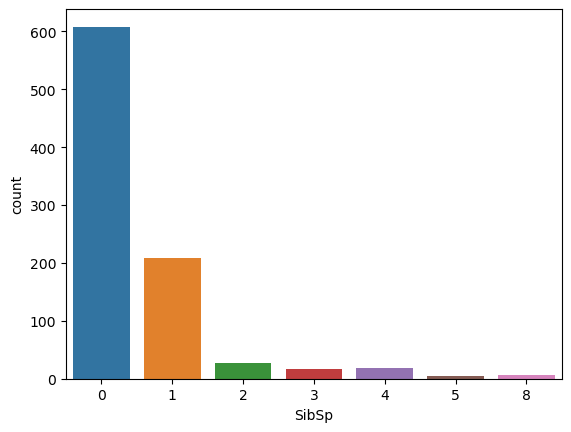

In [34]:
sns.countplot(x='SibSp',data=df)

In [35]:
#we observe that people with no siblings relationship are more in the Titanic

<Axes: xlabel='Parch', ylabel='count'>

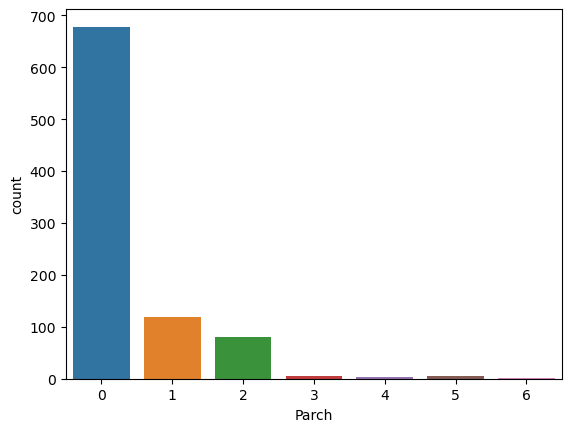

In [36]:
sns.countplot(x='Parch',data=df)

In [37]:
#we notice that parent-child relationship is less in number

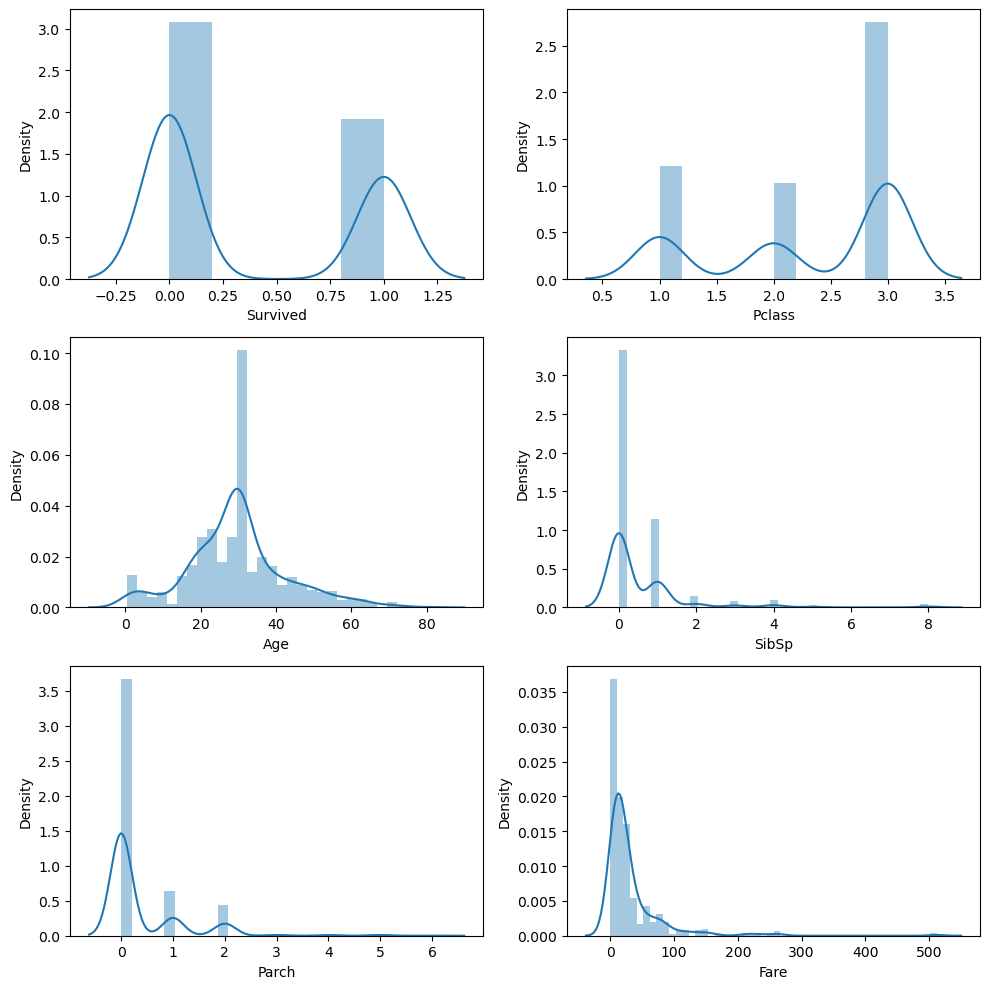

In [38]:
plt.figure(figsize=(10,10))
p=1
for i in num:
    if p<=6:
        plt.subplot(3,2,p)
        sns.distplot(df[i])
        plt.xlabel(i)
    p+=1
plt.tight_layout()

In [39]:
#we notice that columns sibsp,parch,fare have right_skewed data


In [40]:
#BIVARIATE ANALYSIS

<Axes: xlabel='Sex', ylabel='Survived'>

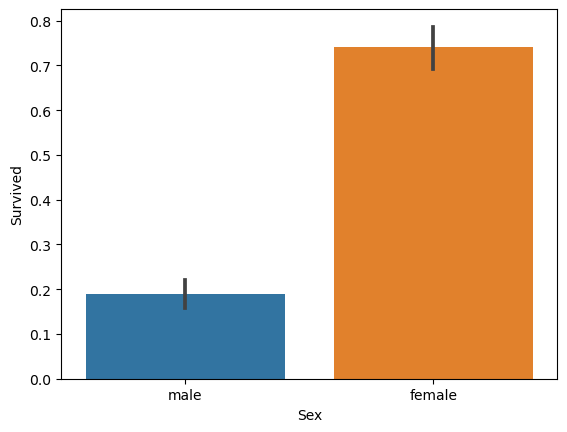

In [41]:
sns.barplot(x='Sex',y='Survived',data=df)

In [42]:
#Male have survived less as compared to females on titanic

<Axes: xlabel='Embarked', ylabel='Survived'>

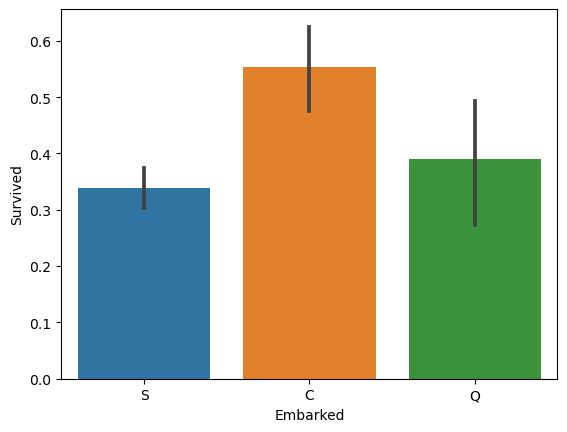

In [43]:
sns.barplot(x='Embarked',y='Survived',data=df)

In [44]:
#People who embarked from 'C' terminal have more survival rate as others

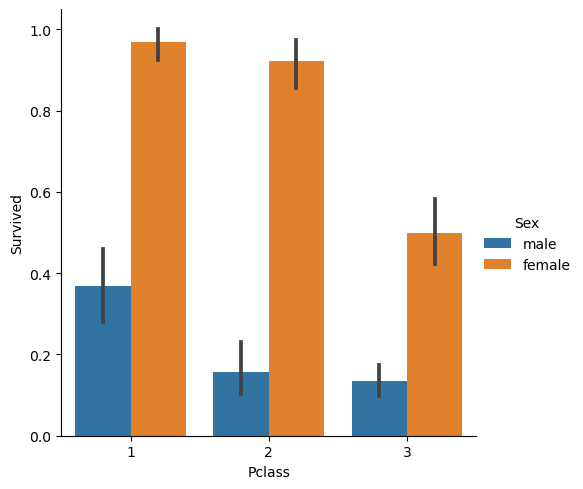

In [56]:
sns.catplot(x='Pclass',hue='Sex',y='Survived',data=df,kind='bar')

In [57]:
#we observe that 1st class females have survived
#majority person survived in second class are femlaes
#IN 3rd class,no one survuved

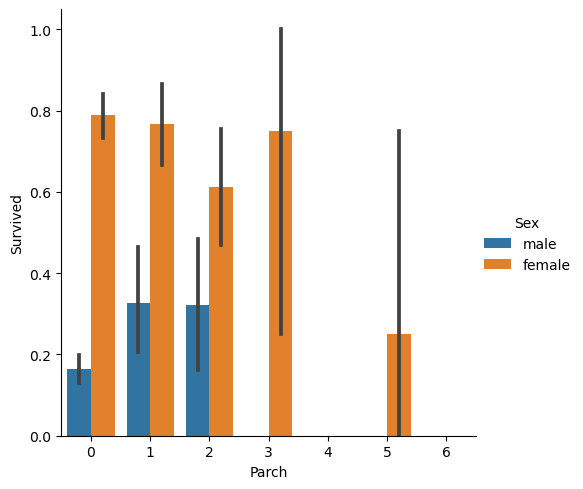

In [60]:
sns.catplot(x='Parch',hue='Sex',y='Survived',data=df,kind='bar')

In [61]:
#we observe that females have survived well as compared to male

In [62]:
#MULTIVARIATE ANALYSIS

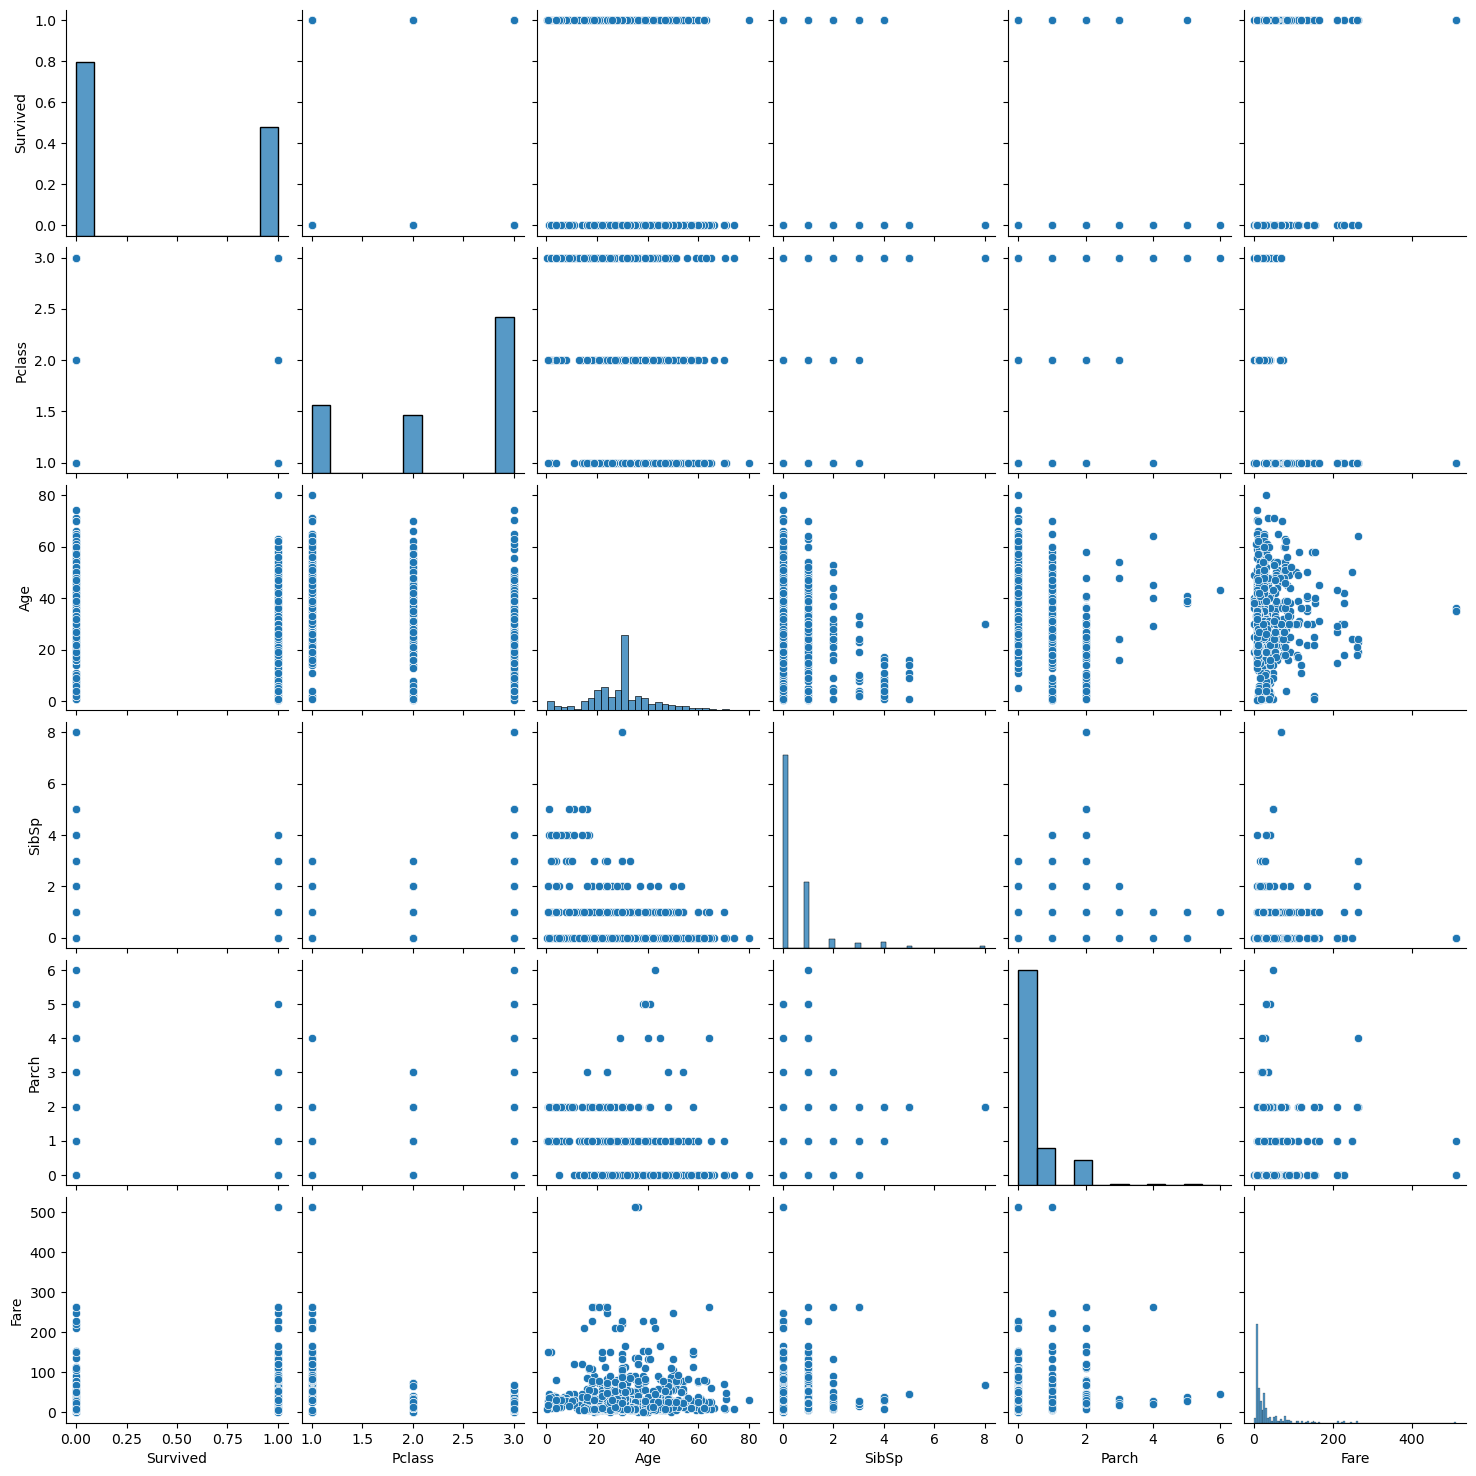

In [63]:
sns.pairplot(df)

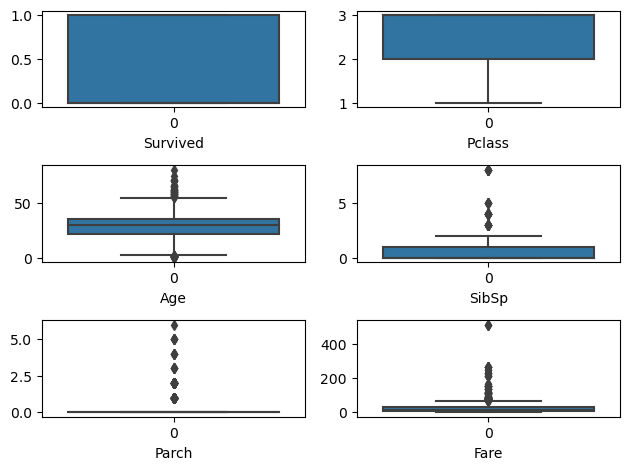

In [68]:
#checking for outliers using boxplot
p=1
for i in num:
    if p<=6:
          plt.subplot(3,2,p)
          sns.boxplot(df[i])
          plt.xlabel(i)
    p+=1
plt.tight_layout()

In [69]:
#we observe that age and fare column have lots of outliers
#As fare and age are considerable columns for predicting survival of persons,so keeping the outliers

In [72]:
#Checking correlation
corr=df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


<Axes: >

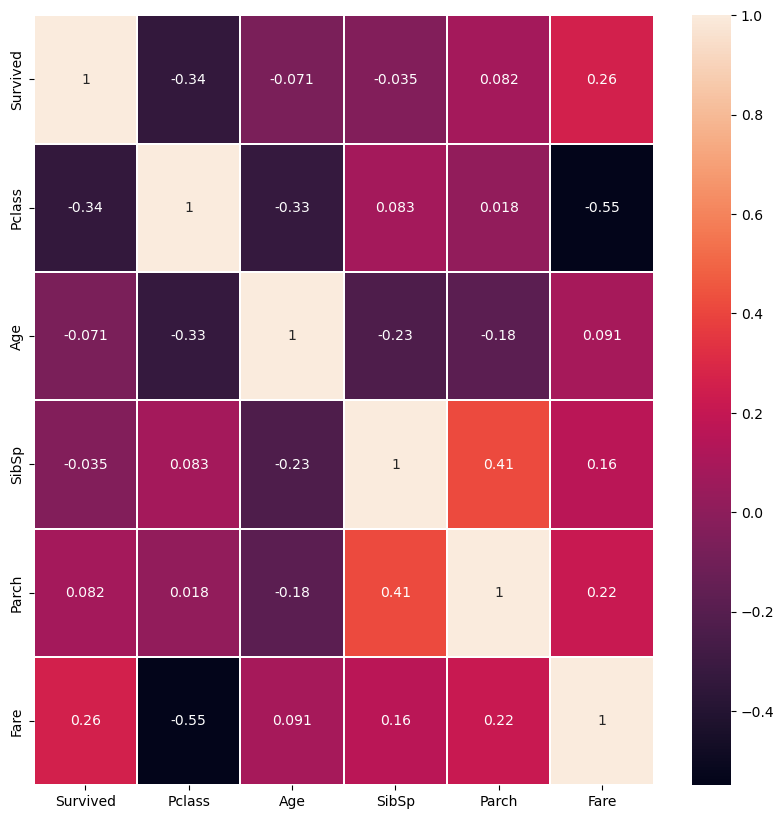

In [73]:
#Plotting haetmap of correlation values
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths='0.2')

In [75]:
#We observe that Sibsp and parch are highly correlated to each other
#Pclass Age sibsp are negatively correlated to target variable
#Parch and Fare are positively correalted to target variable
#Hence Multicollinearity is observed between the columns

In [76]:
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [108]:
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [110]:
#label Encoding categorical columns:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in cat:
      df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [112]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,15.0,2.0
1,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,82.0,0.0
2,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,15.0,2.0
3,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,56.0,2.0
4,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,15.0,2.0
887,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,31.0,2.0
888,0,3,413.0,0.0,30.0,1,2,675.0,23.4500,15.0,2.0
889,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,61.0,0.0


In [77]:
#Seperating xlabel and ylabel
#As we notice that  from categorical columns only Sex and Embarked are considerable for prediction of survival

In [113]:
x=df[['Sex','Embarked','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y=df['Survived']

In [114]:
x

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,1.0,2.0,3,22.0,1,0,7.2500
1,0.0,0.0,1,38.0,1,0,71.2833
2,0.0,2.0,3,26.0,0,0,7.9250
3,0.0,2.0,1,35.0,1,0,53.1000
4,1.0,2.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,1.0,2.0,2,27.0,0,0,13.0000
887,0.0,2.0,1,19.0,0,0,30.0000
888,0.0,2.0,3,30.0,1,2,23.4500
889,1.0,0.0,1,26.0,0,0,30.0000


In [115]:
#Applying Scaling technique to scale the data to make it uniformlly distributed
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,0.737695,0.585954,0.827377,-0.597055,0.432793,-0.473674,-0.502445
1,-1.355574,-1.942303,-1.566107,0.634162,0.432793,-0.473674,0.786845
2,-1.355574,0.585954,0.827377,-0.289251,-0.474545,-0.473674,-0.488854
3,-1.355574,0.585954,-1.566107,0.403309,0.432793,-0.473674,0.420730
4,0.737695,0.585954,0.827377,0.403309,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,0.737695,0.585954,-0.369365,-0.212299,-0.474545,-0.473674,-0.386671
887,-1.355574,0.585954,-1.566107,-0.827908,-0.474545,-0.473674,-0.044381
888,-1.355574,0.585954,0.827377,0.018554,0.432793,2.008933,-0.176263
889,0.737695,-1.942303,-1.566107,-0.289251,-0.474545,-0.473674,-0.044381


In [116]:
#To check for multicollinearity betweeen data lets check VIF factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vi=pd.DataFrame()
vi['Values']=[vif(x.values,i) for i in range(len(x.columns)) ]
vi['Columns']=x.columns

In [117]:
vi

,Values,Columns
0,1.108899,Sex
1,1.079214,Embarked
2,1.669935,Pclass
3,1.204295,Age
4,1.282007,SibSp
5,1.322800,Parch
6,1.648710,Fare


In [118]:
#Dropping Sibling realtionship column as its collinear with Parch
#As SibSp is negatively correlated dropping it

In [119]:
x.drop('SibSp',axis=1,inplace=True)

In [120]:
vi=pd.DataFrame()
vi['Values']=[vif(x.values,i) for i in range(len(x.columns)) ]
vi['Columns']=x.columns

In [121]:
vi

,Values,Columns
0,1.108798,Sex
1,1.072486,Embarked
2,1.652938,Pclass
3,1.177041,Age
4,1.171819,Parch
5,1.608729,Fare


In [122]:
#Checking whether there is imblance in the target variable
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [123]:
#THere is imbalance in the data applyin SMOTE

In [124]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [125]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [94]:
#As the unique values are more,considering it as classification problem

Model Building

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.model_selection import cross_val_score


In [127]:

rfc=RandomForestClassifier()
maxacc=0
maxrs=0
for i in range(201):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    rfc.fit(x_train,y_train)
    ypred= rfc.predict(x_test)
    acc=accuracy_score(y_test,ypred)
   
    
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Maximumaccuracy score of',acc,'at random state',i)

Maximumaccuracy score of 0.803030303030303 at random state 200


In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.30)
rfc.fit(x_train,y_train)
ypred= rfc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)

0.8242424242424242


In [136]:
#Creating train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.30)

In [137]:
#RFC model
rfc.fit(x_train,y_train)
ypred= rfc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8272727272727273
[[137  32]
 [ 25 136]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       169
           1       0.81      0.84      0.83       161

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [138]:
#LR mdel
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypred= lr.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.7848484848484848
[[130  39]
 [ 32 129]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       169
           1       0.77      0.80      0.78       161

    accuracy                           0.78       330
   macro avg       0.79      0.79      0.78       330
weighted avg       0.79      0.78      0.78       330



In [139]:
#GNB model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
ypred= gnb.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.7606060606060606
[[130  39]
 [ 40 121]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       169
           1       0.76      0.75      0.75       161

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



In [140]:
##SVC Model
svc=SVC()
svc.fit(x_train,y_train)
ypred= svc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.793939393939394
[[134  35]
 [ 33 128]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       169
           1       0.79      0.80      0.79       161

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



In [141]:
#BC Model
bc=BaggingClassifier()
bc.fit(x_train,y_train)
ypred= bc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8
[[139  30]
 [ 36 125]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       169
           1       0.81      0.78      0.79       161

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [142]:
#GBC Model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
ypred= gbc.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8303030303030303
[[136  33]
 [ 23 138]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       169
           1       0.81      0.86      0.83       161

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [143]:
##Checking croos val scaore for further validation 

In [144]:
##Lr model
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score nd cross val score is ',(acc-score.mean())*100)

[0.75909091 0.79545455 0.76363636 0.8173516  0.78995434]
0.7850975508509755
Difference between accuracy score nd cross val score is  4.520547945205477


In [145]:
#GBC
score=cross_val_score(gbc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score nd cross val score is ',(acc-score.mean())*100)

[0.75909091 0.82727273 0.80909091 0.84474886 0.84018265]
0.8160772104607721
Difference between accuracy score nd cross val score is  1.4225819842258236


In [146]:
##RFC
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score nd cross val score is ',(acc-score.mean())*100)

[0.76363636 0.84090909 0.82272727 0.85388128 0.84018265]
0.8242673308426733
Difference between accuracy score nd cross val score is  0.603569946035698


In [147]:
##SVC 
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score nd cross val score is ',(acc-score.mean())*100)

[0.73636364 0.8        0.77727273 0.82648402 0.80365297]
0.7887546699875466
Difference between accuracy score nd cross val score is  4.154836031548371


In [148]:
#GNB
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print('Difference between accuracy score nd cross val score is ',(acc-score.mean())*100)

[0.73181818 0.78636364 0.74090909 0.81278539 0.79452055]
0.7732793690327936
Difference between accuracy score nd cross val score is  5.702366127023673


In [149]:
##We observe that RFC ie RandomForestClassifier provides highest accuracy with least error 
##Chooisng the RFC model for further hyperparameter tuning

In [152]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[1,2,3,4,5],
           'max_features':[1,2,3,5],
           'n_estimators':[100,200,400,500],
           'criterion':["gini", "entropy"]}
gcv= GridSearchCV(rfc,parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 5],
                         'n_estimators': [100, 200, 400, 500]})

In [153]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 100}

In [154]:
#Finally building an model with best parameters
rfcmodel=RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features= 5,n_estimators= 100)
rfcmodel.fit(x_train,y_train)
ypred= rfcmodel.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

0.8151515151515152
[[139  30]
 [ 31 130]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       169
           1       0.81      0.81      0.81       161

    accuracy                           0.82       330
   macro avg       0.82      0.81      0.82       330
weighted avg       0.82      0.82      0.82       330



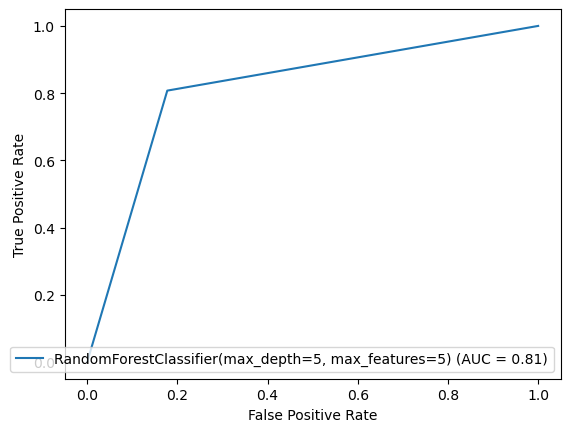

In [160]:
#Plotting AUC ROC curve
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,ypred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=rfcmodel)
display.plot()

In [161]:
#We observe that AUC value is 0.81 which is close to 1,which is a good thing 

In [162]:
#saving best model
import joblib
joblib.dump(rfcmodel,'Titanic_prediction_rfc.pkl')


['Titanic_prediction_rfc.pkl']

In [163]:
model=joblib.load('Titanic_prediction_rfc.pkl')
model

RandomForestClassifier(max_depth=5, max_features=5)

In [164]:
prediction=model.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [165]:
df=pd.DataFrame()
a=np.array(y_test)
df['Actual values']=a
df['Predicted Values']=prediction

In [166]:
df

,Actual values,Predicted Values
0,1,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
325,1,1
326,1,0
327,1,1
328,1,1
